In [104]:
#Linear Regression Machine Learning Example

#https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

#https://www.startertutorials.com/blog/linear-regression-single-variable-in-python.html

#https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import linear_model


#from sklearn.datasets import load_boston
#boston_dataset = load_boston()
#print(boston_dataset)
#print(boston_dataset.keys())
#boston_dataset.DESCR

dataset = pd.read_csv (r'Salary.csv')
dataset.head()
#df.describe()

#print(df.keys())
#print(df)


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [105]:
#Load Data into a Pandas Dataframe 
#salary_df = pd.DataFrame(df, columns=df.feature_names)

#Check for empty cells
dataset.isnull().sum()



YearsExperience    0
Salary             0
dtype: int64

C:\Users\mguza\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


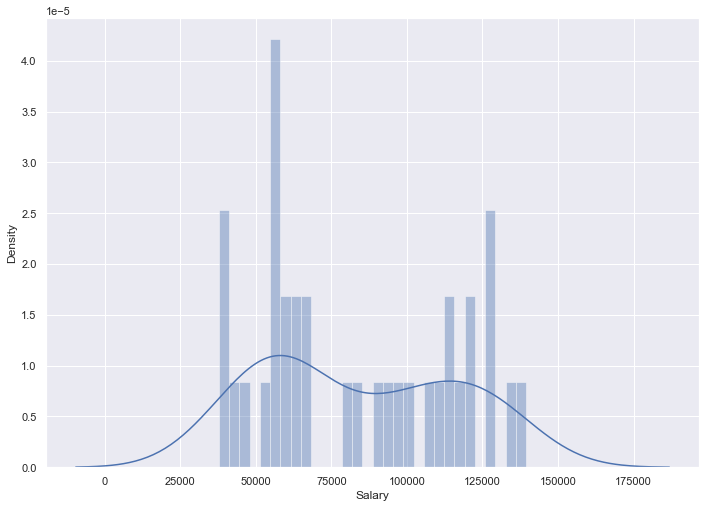

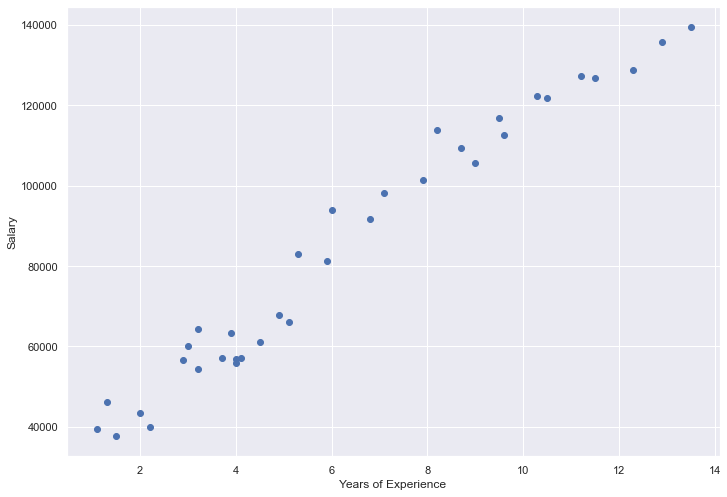

In [106]:
#Plot the data visually
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(dataset['Salary'], bins=30)
plt.show()

plt.xlabel("Years of Experience ")
plt.ylabel("Salary")
plt.scatter(dataset.YearsExperience, dataset.Salary)

In [107]:
#Create a Linear Regression Model (Simple)
#reg = linear_model.LinearRegression()
#reg.fit(df[['YearsExperience']], df.Salary)

#Predict Salary for Someone with A Certain Number of Years Experience
#reg.predict([[2]])

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]
 [11.2]
 [11.5]
 [12.3]
 [12.9]
 [13.5]]
[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872
 127345 126756 128765 135675 139465]
Intercept: 29445.0565201813
Slope: [8629.79240044]


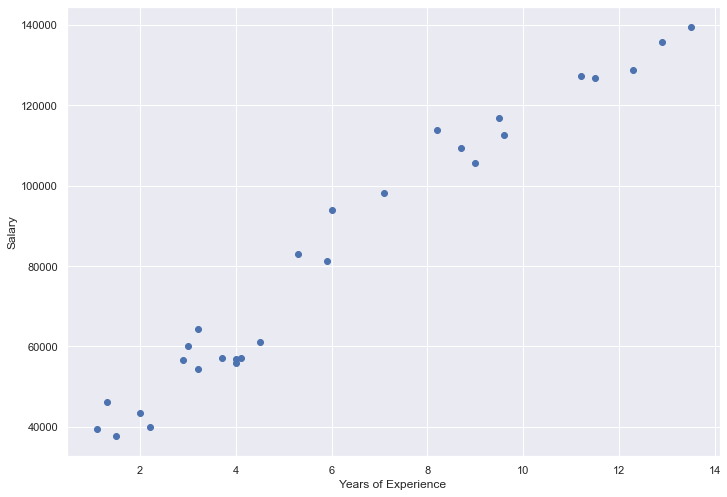

In [108]:
#Assign X and Y Values
#X = df.YearsExperience
#Y = df.Salary

#Prepare the dataset
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 1].values

#X = df['YearsExperience']
#Y = df['Salary']


print(X)
print(Y)

#Split data into training/test sets 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

#Get the intercept
print(f"Intercept: {regressor.intercept_}")

#Get the Slope (coefficient of X)
print(f"Slope: {regressor.coef_}")

#print(X_train)
#print(Y_train)

#Plot X_train and Y_train as a sanity check
plt.xlabel("Years of Experience ")
plt.ylabel("Salary")
plt.scatter(X_train, Y_train)



In [109]:
#Make Predictions
y_pred = regressor.predict(X_test)
print(y_pred)

df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df

[120057.87672477  88127.64484315  73456.99776241 118331.91824468
  97620.41648363  71731.03928232  63101.24688189]


,Actual,Predicted
0,121872,120057.876725
1,91738,88127.644843
2,66029,73456.997762
3,122391,118331.918245
4,101302,97620.416484
5,67938,71731.039282
6,63218,63101.246882


In [110]:
# model evaluation for training set

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))


Mean Absolute Error: 3500.419123800645
Mean Squared Error: 16561691.220974576
Root Mean Squared Error: 4069.6057820106575


In [111]:
#Multiple Linear Regression 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dataset2 = pd.read_csv('petrol_consumption.csv')
dataset2.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [112]:
dataset2.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [113]:
X = dataset2[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]
Y = dataset2['Petrol_Consumption']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression
regressor2 = LinearRegression()
regressor2.fit(X_train, Y_train)

coeff_df = pd.DataFrame(regressor2.coef_, X.columns, columns=['Coefficient'])
coeff_df



,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


In [114]:
#Make some predictions
y_pred = regressor2.predict(X_test)

#Compare Y_test to y_pred to get residuals
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


In [115]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 56.822247478964684
Mean Squared Error: 4666.3447875883585
Root Mean Squared Error: 68.31064915215165
